In [1]:
import numpy as np 
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator # for data augmentation
from matplotlib import pyplot
import csv

2022-06-26 15:41:04.198837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_path="/Users/joannaborowa/Desktop/archive 3/sign_mnist_train.csv"
train = open(file_path).read()

In [3]:
train = train.split("\n")[1:-1]
train = [i.split(",") for i in train]
X_train = np.array([[int(i[j]) for j in range(1,len(i))] for i in train])
y_train = np.array([int(i[0]) for i in train])

In [4]:
X_train = X_train[0:9]
y_train = y_train[0:9]

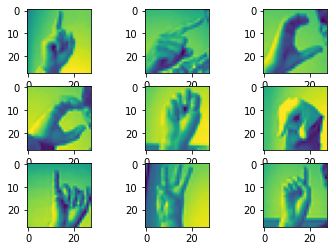

In [5]:
for i in range(0, 9):
        pyplot.subplot(3,3,i+1)
        pyplot.imshow(X_train[i].reshape((28, 28)))
pyplot.show()

In [6]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')

In [7]:
filename = "new_image_data.csv"
new_data = [] #store new images
new_label = [] #store the lable of new images

In [16]:
# more kinds of augmentation can be found at https://keras.io/preprocessing/image/
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,   
        samplewise_std_normalization=False,   
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)
datagen.fit(X_train)

In [17]:
#output new images into CSV
def write_to_csv(original_data, label, filename):
    for i in range(0, len(original_data)):
        pre_process = original_data[i].reshape((28*28,1))
        single_pic = []
        single_pic.append(label[0][i])
        for j in range(0,len(pre_process)):
            temp_pix = pre_process[j][0]
            single_pic.append(temp_pix)
        with open(filename,"a") as f:
            f_csv = csv.writer(f, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
            f_csv.writerow(single_pic)

In [18]:
number_of_batches = 100
batches = 0

for X_batch, Y_batch in datagen.flow(X_train, y_train, batch_size=10):
    new_data.append(X_batch)
    new_label.append(Y_batch) 
#         loss = model.train(X_batch, Y_batch)
    batches += 1
    if batches >= number_of_batches:
        # we need to break the loop by hand because
        # the generator loops indefinitely
        break

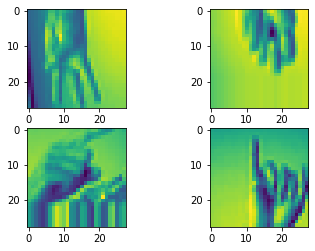

In [19]:
#show the new images
for i in range(0, 4):
        pyplot.subplot(2,2,i+1)
        pyplot.imshow(new_data[1][i].reshape((28, 28)))
    # show the plot
pyplot.show()

In [20]:
#write new images into CSV
for i in range(0,len(new_data)):
    write_to_csv(new_data[i], new_label, filename)